In [1]:
import pandas as pd
import csv
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np
import matplotlib.gridspec as gridspec
import sqlite3
from re import search
import datetime
import itertools

In [2]:
from numpy import mean
from numpy import std
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
file1 = '/Users/jasleensandhu/Downloads/2005-19_Local_Authority_CO2_emissions.csv'

In [5]:
avon_df = pd.read_csv('avon_data.csv')

In [6]:
avon_df.columns = ['index','Crime_ID', 'Month', 'Reported_by', 'Falls_within', 'Longitude', 'Latitude', 
                   'Location', 'LSOA_code', 'LSOA_name', 'Crime_type', 'Last_outcome_category', 'Context']

In [7]:
avon_df['Month'] = [i.year for i in pd.to_datetime(avon_df['Month'])]

In [8]:
### Remove Nan Values
avon_df = avon_df.dropna(subset=['LSOA_name'])

In [9]:
avon_df['lsoa_name'] = [i[:-5] for i in avon_df['LSOA_name']]

In [10]:
avon_df['LSOA_name'][4][:-5]

'Bath and North East Somerset'

In [11]:
df_co2 = pd.read_csv(file1)

In [12]:
df_co2 = df_co2[df_co2['Region'] == 'South West']

In [13]:
df_co2 = df_co2[['Local Authority', 'Calendar Year', 
                'LA CO2 Sector', 'Territorial emissions (kt CO2)', 'Mid-year Population (thousands)']]

In [14]:
df_co2 = df_co2[2014 <= df_co2['Calendar Year']]

In [15]:
# Map the C02 onto avon
mapped = avon_df[avon_df['lsoa_name'].isin(df_co2['Local Authority'].unique())]

In [16]:
## Set the lengths to the same size

In [17]:
## lst of Local authorities
las = df_co2['Local Authority'].unique()

In [18]:
# pollution = [sum(df_co2.loc[(df_co2['Calendar Year'] == i)]['Territorial emissions (kt CO2)']) for i in range(2014, 2020)]
bath_pol = [sum((df_co2.loc[(df_co2['Calendar Year'] == i) & (df_co2['Local Authority'] == 'Bath and North East Somerset')])['Territorial emissions (kt CO2)']) for i in range(2014, 2020)]


In [19]:
### Pollution

bath_pol = [sum((df_co2.loc[(df_co2['Calendar Year'] == i) & (df_co2['Local Authority'] == 'Bath and North East Somerset')])['Territorial emissions (kt CO2)']) for i in range(2014, 2020)]
bris_pol = [sum((df_co2.loc[(df_co2['Calendar Year'] == i) & (df_co2['Local Authority'] == 'Bristol, City of')])['Territorial emissions (kt CO2)']) for i in range(2014, 2020)]
north_pol = [sum((df_co2.loc[(df_co2['Calendar Year'] == i) & (df_co2['Local Authority'] == 'North Somerset')])['Territorial emissions (kt CO2)']) for i in range(2014, 2020)]
south_pol = [sum((df_co2.loc[(df_co2['Calendar Year'] == i) & (df_co2['Local Authority'] == 'South Gloucestershire')])['Territorial emissions (kt CO2)']) for i in range(2014, 2020)]
plymouth_pol = [sum((df_co2.loc[(df_co2['Calendar Year'] == i) & (df_co2['Local Authority'] == 'Plymouth')])['Territorial emissions (kt CO2)']) for i in range(2014, 2020)]
torbay_pol = [sum((df_co2.loc[(df_co2['Calendar Year'] == i) & (df_co2['Local Authority'] == 'Torbay')])['Territorial emissions (kt CO2)']) for i in range(2014, 2020)]
swid_pol = [sum((df_co2.loc[(df_co2['Calendar Year'] == i) & (df_co2['Local Authority'] == 'Swindon')])['Territorial emissions (kt CO2)']) for i in range(2014, 2020)]
corn_pol = [sum((df_co2.loc[(df_co2['Calendar Year'] == i) & (df_co2['Local Authority'] == 'Cornwall')])['Territorial emissions (kt CO2)']) for i in range(2014, 2020)]
isle_pol = [sum((df_co2.loc[(df_co2['Calendar Year'] == i) & (df_co2['Local Authority'] == 'Isles of Scilly')])['Territorial emissions (kt CO2)']) for i in range(2014, 2020)]
wilt_pol = [sum((df_co2.loc[(df_co2['Calendar Year'] == i) & (df_co2['Local Authority'] == 'Wiltshire')])['Territorial emissions (kt CO2)']) for i in range(2014, 2020)]

# bourn_pol = [sum((df_co2.loc[(df_co2['Calendar Year'] == i) & (df_co2['Local Authority'] == 'Bath and North East Somerset')])['Territorial emissions (kt CO2)']) for i in range(2014, 2020)]
chirch_pol = [sum((df_co2.loc[(df_co2['Calendar Year'] == i) & (df_co2['Local Authority'] == 'Bournemouth, Christchurch and Poole')])['Territorial emissions (kt CO2)']) for i in range(2014, 2020)]
dorse_pol = [sum((df_co2.loc[(df_co2['Calendar Year'] == i) & (df_co2['Local Authority'] == 'Dorset')])['Territorial emissions (kt CO2)']) for i in range(2014, 2020)]
east_pol = [sum((df_co2.loc[(df_co2['Calendar Year'] == i) & (df_co2['Local Authority'] == 'East Devon')])['Territorial emissions (kt CO2)']) for i in range(2014, 2020)]



exter_pol = [sum((df_co2.loc[(df_co2['Calendar Year'] == i) & (df_co2['Local Authority'] == 'Exeter')])['Territorial emissions (kt CO2)']) for i in range(2014, 2020)]
mid_pol = [sum((df_co2.loc[(df_co2['Calendar Year'] == i) & (df_co2['Local Authority'] == 'Mid Devon')])['Territorial emissions (kt CO2)']) for i in range(2014, 2020)]
devon_pol = [sum((df_co2.loc[(df_co2['Calendar Year'] == i) & (df_co2['Local Authority'] == 'North Devon')])['Territorial emissions (kt CO2)']) for i in range(2014, 2020)]
hams_pol = [sum((df_co2.loc[(df_co2['Calendar Year'] == i) & (df_co2['Local Authority'] == 'South Hams')])['Territorial emissions (kt CO2)']) for i in range(2014, 2020)]
     
tei_pol = [sum((df_co2.loc[(df_co2['Calendar Year'] == i) & (df_co2['Local Authority'] == 'Teignbridge')])['Territorial emissions (kt CO2)']) for i in range(2014, 2020)]
torrige_pol = [sum((df_co2.loc[(df_co2['Calendar Year'] == i) & (df_co2['Local Authority'] == 'Torridge')])['Territorial emissions (kt CO2)']) for i in range(2014, 2020)]
westdev_pol = [sum((df_co2.loc[(df_co2['Calendar Year'] == i) & (df_co2['Local Authority'] == 'West Devon')])['Territorial emissions (kt CO2)']) for i in range(2014, 2020)]
chel_pol = [sum((df_co2.loc[(df_co2['Calendar Year'] == i) & (df_co2['Local Authority'] == 'Cheltenham')])['Territorial emissions (kt CO2)']) for i in range(2014, 2020)]
cot_pol = [sum((df_co2.loc[(df_co2['Calendar Year'] == i) & (df_co2['Local Authority'] == 'Cotswold')])['Territorial emissions (kt CO2)']) for i in range(2014, 2020)]

forrest_pol = [sum((df_co2.loc[(df_co2['Calendar Year'] == i) & (df_co2['Local Authority'] == 'Forest of Dean')])['Territorial emissions (kt CO2)']) for i in range(2014, 2020)]
glouc_pol = [sum((df_co2.loc[(df_co2['Calendar Year'] == i) & (df_co2['Local Authority'] == 'Gloucester')])['Territorial emissions (kt CO2)']) for i in range(2014, 2020)]
stroud_pol = [sum((df_co2.loc[(df_co2['Calendar Year'] == i) & (df_co2['Local Authority'] == 'Stroud')])['Territorial emissions (kt CO2)']) for i in range(2014, 2020)]
tewkesbury_pol = [sum((df_co2.loc[(df_co2['Calendar Year'] == i) & (df_co2['Local Authority'] == 'Tewkesbury')])['Territorial emissions (kt CO2)']) for i in range(2014, 2020)]

mendip_pol = [sum((df_co2.loc[(df_co2['Calendar Year'] == i) & (df_co2['Local Authority'] == 'Mendip')])['Territorial emissions (kt CO2)']) for i in range(2014, 2020)]
sedgemoor_pol = [sum((df_co2.loc[(df_co2['Calendar Year'] == i) & (df_co2['Local Authority'] == 'Sedgemoor')])['Territorial emissions (kt CO2)']) for i in range(2014, 2020)]
soutsomer_pol = [sum((df_co2.loc[(df_co2['Calendar Year'] == i) & (df_co2['Local Authority'] == 'South Somerset')])['Territorial emissions (kt CO2)']) for i in range(2014, 2020)]
somer_taun_pol = [sum((df_co2.loc[(df_co2['Calendar Year'] == i) & (df_co2['Local Authority'] == 'Somerset West and Taunton')])['Territorial emissions (kt CO2)']) for i in range(2014, 2020)]



In [20]:
pollutions = [bath_pol, bris_pol, north_pol, south_pol, plymouth_pol, torbay_pol, swid_pol, corn_pol, isle_pol, wilt_pol,
             chirch_pol, dorse_pol, east_pol, exter_pol, mid_pol, devon_pol, hams_pol, tei_pol, torrige_pol, westdev_pol, 
            chel_pol, cot_pol, forrest_pol, glouc_pol, stroud_pol, tewkesbury_pol, mendip_pol, sedgemoor_pol, soutsomer_pol,
             somer_taun_pol]
dictionary = dict(zip(las, pollutions))

In [21]:
## population

bath_pol = [sum((df_co2.loc[(df_co2['Calendar Year'] == i) & (df_co2['Local Authority'] == 'Bath and North East Somerset')])['Mid-year Population (thousands)']) for i in range(2014, 2020)]
bris_pol = [sum((df_co2.loc[(df_co2['Calendar Year'] == i) & (df_co2['Local Authority'] == 'Bristol, City of')])['Mid-year Population (thousands)']) for i in range(2014, 2020)]
north_pol = [sum((df_co2.loc[(df_co2['Calendar Year'] == i) & (df_co2['Local Authority'] == 'North Somerset')])['Mid-year Population (thousands)']) for i in range(2014, 2020)]
south_pol = [sum((df_co2.loc[(df_co2['Calendar Year'] == i) & (df_co2['Local Authority'] == 'South Gloucestershire')])['Mid-year Population (thousands)']) for i in range(2014, 2020)]
plymouth_pol = [sum((df_co2.loc[(df_co2['Calendar Year'] == i) & (df_co2['Local Authority'] == 'Plymouth')])['Mid-year Population (thousands)']) for i in range(2014, 2020)]
torbay_pol = [sum((df_co2.loc[(df_co2['Calendar Year'] == i) & (df_co2['Local Authority'] == 'Torbay')])['Mid-year Population (thousands)']) for i in range(2014, 2020)]
swid_pol = [sum((df_co2.loc[(df_co2['Calendar Year'] == i) & (df_co2['Local Authority'] == 'Swindon')])['Mid-year Population (thousands)']) for i in range(2014, 2020)]
corn_pol = [sum((df_co2.loc[(df_co2['Calendar Year'] == i) & (df_co2['Local Authority'] == 'Cornwall')])['Mid-year Population (thousands)']) for i in range(2014, 2020)]
isle_pol = [sum((df_co2.loc[(df_co2['Calendar Year'] == i) & (df_co2['Local Authority'] == 'Isles of Scilly')])['Mid-year Population (thousands)']) for i in range(2014, 2020)]
wilt_pol = [sum((df_co2.loc[(df_co2['Calendar Year'] == i) & (df_co2['Local Authority'] == 'Wiltshire')])['Mid-year Population (thousands)']) for i in range(2014, 2020)]

# bourn_pol = [sum((df_co2.loc[(df_co2['Calendar Year'] == i) & (df_co2['Local Authority'] == 'Bath and North East Somerset')])['Territorial emissions (kt CO2)']) for i in range(2014, 2020)]
chirch_pol = [sum((df_co2.loc[(df_co2['Calendar Year'] == i) & (df_co2['Local Authority'] == 'Bournemouth, Christchurch and Poole')])['Mid-year Population (thousands)']) for i in range(2014, 2020)]
dorse_pol = [sum((df_co2.loc[(df_co2['Calendar Year'] == i) & (df_co2['Local Authority'] == 'Dorset')])['Mid-year Population (thousands)']) for i in range(2014, 2020)]
east_pol = [sum((df_co2.loc[(df_co2['Calendar Year'] == i) & (df_co2['Local Authority'] == 'East Devon')])['Mid-year Population (thousands)']) for i in range(2014, 2020)]

exter_pol = [sum((df_co2.loc[(df_co2['Calendar Year'] == i) & (df_co2['Local Authority'] == 'Exeter')])['Mid-year Population (thousands)']) for i in range(2014, 2020)]
mid_pol = [sum((df_co2.loc[(df_co2['Calendar Year'] == i) & (df_co2['Local Authority'] == 'Mid Devon')])['Mid-year Population (thousands)']) for i in range(2014, 2020)]
devon_pol = [sum((df_co2.loc[(df_co2['Calendar Year'] == i) & (df_co2['Local Authority'] == 'North Devon')])['Mid-year Population (thousands)']) for i in range(2014, 2020)]
hams_pol = [sum((df_co2.loc[(df_co2['Calendar Year'] == i) & (df_co2['Local Authority'] == 'South Hams')])['Mid-year Population (thousands)']) for i in range(2014, 2020)]
     
tei_pol = [sum((df_co2.loc[(df_co2['Calendar Year'] == i) & (df_co2['Local Authority'] == 'Teignbridge')])['Mid-year Population (thousands)']) for i in range(2014, 2020)]
torrige_pol = [sum((df_co2.loc[(df_co2['Calendar Year'] == i) & (df_co2['Local Authority'] == 'Torridge')])['Mid-year Population (thousands)']) for i in range(2014, 2020)]
westdev_pol = [sum((df_co2.loc[(df_co2['Calendar Year'] == i) & (df_co2['Local Authority'] == 'West Devon')])['Mid-year Population (thousands)']) for i in range(2014, 2020)]
chel_pol = [sum((df_co2.loc[(df_co2['Calendar Year'] == i) & (df_co2['Local Authority'] == 'Cheltenham')])['Mid-year Population (thousands)']) for i in range(2014, 2020)]
cot_pol = [sum((df_co2.loc[(df_co2['Calendar Year'] == i) & (df_co2['Local Authority'] == 'Cotswold')])['Mid-year Population (thousands)']) for i in range(2014, 2020)]

forrest_pol = [sum((df_co2.loc[(df_co2['Calendar Year'] == i) & (df_co2['Local Authority'] == 'Forest of Dean')])['Mid-year Population (thousands)']) for i in range(2014, 2020)]
glouc_pol = [sum((df_co2.loc[(df_co2['Calendar Year'] == i) & (df_co2['Local Authority'] == 'Gloucester')])['Mid-year Population (thousands)']) for i in range(2014, 2020)]
stroud_pol = [sum((df_co2.loc[(df_co2['Calendar Year'] == i) & (df_co2['Local Authority'] == 'Stroud')])['Mid-year Population (thousands)']) for i in range(2014, 2020)]
tewkesbury_pol = [sum((df_co2.loc[(df_co2['Calendar Year'] == i) & (df_co2['Local Authority'] == 'Tewkesbury')])['Mid-year Population (thousands)']) for i in range(2014, 2020)]

mendip_pol = [sum((df_co2.loc[(df_co2['Calendar Year'] == i) & (df_co2['Local Authority'] == 'Mendip')])['Mid-year Population (thousands)']) for i in range(2014, 2020)]
sedgemoor_pol = [sum((df_co2.loc[(df_co2['Calendar Year'] == i) & (df_co2['Local Authority'] == 'Sedgemoor')])['Mid-year Population (thousands)']) for i in range(2014, 2020)]
soutsomer_pol = [sum((df_co2.loc[(df_co2['Calendar Year'] == i) & (df_co2['Local Authority'] == 'South Somerset')])['Mid-year Population (thousands)']) for i in range(2014, 2020)]
somer_taun_pol = [sum((df_co2.loc[(df_co2['Calendar Year'] == i) & (df_co2['Local Authority'] == 'Somerset West and Taunton')])['Mid-year Population (thousands)']) for i in range(2014, 2020)]


In [22]:
population = [bath_pol, bris_pol, north_pol, south_pol, plymouth_pol, torbay_pol, swid_pol, corn_pol, isle_pol, wilt_pol,
             chirch_pol, dorse_pol, east_pol, exter_pol, mid_pol, devon_pol, hams_pol, tei_pol, torrige_pol, westdev_pol, 
            chel_pol, cot_pol, forrest_pol, glouc_pol, stroud_pol, tewkesbury_pol, mendip_pol, sedgemoor_pol, soutsomer_pol,
             somer_taun_pol]
dictionary = dict(zip(las, population))


In [23]:
df_2014 = avon_df.loc[avon_df['Month'] == 2014]

In [24]:
co2_2014 = df_co2.loc[df_co2['Calendar Year'] == 2014]

In [25]:
def pollution_dates(region, year):
    dataframe_year =  mapped.loc[mapped['Month'] == year]
    df_region = dataframe_year.loc[dataframe_year['lsoa_name'] == region]
    
    if year == 2014:
        df_region['pollution'] = dictionary[region][0]
    elif year == 2015:
        df_region['pollution'] = dictionary[region][1]
    elif year == 2016:
        df_region['pollution'] = dictionary[region][2]
    elif year == 2017:
        df_region['pollution'] = dictionary[region][3]
    elif year == 2018:
        df_region['pollution'] = dictionary[region][4]
    else:
        df_region['pollution'] = dictionary[region][5]
        
    return df_region

In [26]:
def population_dates(region, year):
    dataframe_year =  mapped.loc[mapped['Month'] == year]
    df_region = dataframe_year.loc[dataframe_year['lsoa_name'] == region]
    
    if year == 2014:
        df_region['population'] = dictionary[region][0]
    elif year == 2015:
        df_region['population'] = dictionary[region][1]
    elif year == 2016:
        df_region['population'] = dictionary[region][2]
    elif year == 2017:
        df_region['population'] = dictionary[region][3]
    elif year == 2018:
        df_region['population'] = dictionary[region][4]
    else:
        df_region['population'] = dictionary[region][5]
        
    return df_region

In [27]:
## pollution

bath = [(pollution_dates('Bath and North East Somerset', i)) for i in range(2014, 2020)]
bristol = [(pollution_dates('Bristol, City of', i)) for i in range(2014, 2020)]
north_som = [(pollution_dates('North Somerset', i)) for i in range(2014, 2020)] 

south_glou = [(pollution_dates('South Gloucestershire', i)) for i in range(2014, 2020)]
ply = [(pollution_dates('Plymouth', i)) for i in range(2014, 2020)]
torbay = [(pollution_dates('Torbay', i)) for i in range(2014, 2020)] 

swindon = [(pollution_dates('Swindon', i)) for i in range(2014, 2020)]
cornwal = [(pollution_dates('Cornwall', i)) for i in range(2014, 2020)]
isle = [(pollution_dates('Isles of Scilly', i)) for i in range(2014, 2020)] 

wilt = [(pollution_dates('Wiltshire', i)) for i in range(2014, 2020)]
bouhem = [(pollution_dates('Bournemouth, Christchurch and Poole', i)) for i in range(2014, 2020)]
dorse = [(pollution_dates('Dorset', i)) for i in range(2014, 2020)] 

east_dev = [(pollution_dates('East Devon', i)) for i in range(2014, 2020)]
exeter = [(pollution_dates('Exeter', i)) for i in range(2014, 2020)]
mid = [(pollution_dates('Mid Devon', i)) for i in range(2014, 2020)] 

north_dev = [(pollution_dates('North Devon', i)) for i in range(2014, 2020)]
south_ham = [(pollution_dates('South Hams', i)) for i in range(2014, 2020)]
teign = [(pollution_dates('Teignbridge', i)) for i in range(2014, 2020)] 

torr = [(pollution_dates('Torridge', i)) for i in range(2014, 2020)]
west_dev = [(pollution_dates('West Devon', i)) for i in range(2014, 2020)]
chelten = [(pollution_dates('Cheltenham', i)) for i in range(2014, 2020)] 

cotsw = [(pollution_dates('Cotswold', i)) for i in range(2014, 2020)]
forest = [(pollution_dates('Forest of Dean', i)) for i in range(2014, 2020)]
gloucester = [(pollution_dates('Gloucester', i)) for i in range(2014, 2020)] 

stroud = [(pollution_dates('Stroud', i)) for i in range(2014, 2020)]
tewkes = [(pollution_dates('Tewkesbury', i)) for i in range(2014, 2020)]
mendip = [(pollution_dates('Mendip', i)) for i in range(2014, 2020)]

sedgem = [(pollution_dates('Sedgemoor', i)) for i in range(2014, 2020)]
south_somer = [(pollution_dates('South Somerset', i)) for i in range(2014, 2020)]
somerset_west = [(pollution_dates('Somerset West and Taunton', i)) for i in range(2014, 2020)] 



<ipython-input-25-81a40ba84fcf>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_region['pollution'] = dictionary[region][0]
<ipython-input-25-81a40ba84fcf>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_region['pollution'] = dictionary[region][1]
<ipython-input-25-81a40ba84fcf>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

In [28]:
## population
## pollution

bath = [(population_dates('Bath and North East Somerset', i)) for i in range(2014, 2020)]
bristol = [(population_dates('Bristol, City of', i)) for i in range(2014, 2020)]
north_som = [(population_dates('North Somerset', i)) for i in range(2014, 2020)] 

south_glou = [(population_dates('South Gloucestershire', i)) for i in range(2014, 2020)]
ply = [(population_dates('Plymouth', i)) for i in range(2014, 2020)]
torbay = [(population_dates('Torbay', i)) for i in range(2014, 2020)] 

swindon = [(population_dates('Swindon', i)) for i in range(2014, 2020)]
cornwal = [(population_dates('Cornwall', i)) for i in range(2014, 2020)]
isle = [(population_dates('Isles of Scilly', i)) for i in range(2014, 2020)] 

wilt = [(population_dates('Wiltshire', i)) for i in range(2014, 2020)]
bouhem = [(population_dates('Bournemouth, Christchurch and Poole', i)) for i in range(2014, 2020)]
dorse = [(population_dates('Dorset', i)) for i in range(2014, 2020)] 

east_dev = [(population_dates('East Devon', i)) for i in range(2014, 2020)]
exeter = [(population_dates('Exeter', i)) for i in range(2014, 2020)]
mid = [(population_dates('Mid Devon', i)) for i in range(2014, 2020)] 

north_dev = [(population_dates('North Devon', i)) for i in range(2014, 2020)]
south_ham = [(population_dates('South Hams', i)) for i in range(2014, 2020)]
teign = [(population_dates('Teignbridge', i)) for i in range(2014, 2020)] 

torr = [(population_dates('Torridge', i)) for i in range(2014, 2020)]
west_dev = [(population_dates('West Devon', i)) for i in range(2014, 2020)]
chelten = [(population_dates('Cheltenham', i)) for i in range(2014, 2020)] 

cotsw = [(population_dates('Cotswold', i)) for i in range(2014, 2020)]
forest = [(population_dates('Forest of Dean', i)) for i in range(2014, 2020)]
gloucester = [(population_dates('Gloucester', i)) for i in range(2014, 2020)] 

stroud = [(population_dates('Stroud', i)) for i in range(2014, 2020)]
tewkes = [(population_dates('Tewkesbury', i)) for i in range(2014, 2020)]
mendip = [(population_dates('Mendip', i)) for i in range(2014, 2020)]

sedgem = [(population_dates('Sedgemoor', i)) for i in range(2014, 2020)]
south_somer = [(population_dates('South Somerset', i)) for i in range(2014, 2020)]
somerset_west = [(population_dates('Somerset West and Taunton', i)) for i in range(2014, 2020)] 


<ipython-input-26-599438bb6a23>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_region['population'] = dictionary[region][0]
<ipython-input-26-599438bb6a23>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_region['population'] = dictionary[region][1]
<ipython-input-26-599438bb6a23>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [29]:
# list(set(mapped['lsoa_name'].unique()) - set(avon_df['lsoa_name'].unique()))

lst_pdf = [bath, bristol, north_som, south_glou, ply, torbay, swindon, cornwal, isle,
wilt, bouhem, dorse, east_dev, exeter, mid, north_dev, south_ham, teign,
torr, west_dev, chelten, cotsw, forest, gloucester, stroud, tewkes,
mendip, sedgem, south_somer, somerset_west]


In [30]:
pollution = pd.concat([pd.concat(i) for i in lst_pdf])

In [31]:
lst_pdf = [bath, bristol, north_som, south_glou, ply, torbay, swindon, cornwal, isle,
wilt, bouhem, dorse, east_dev, exeter, mid, north_dev, south_ham, teign,
torr, west_dev, chelten, cotsw, forest, gloucester, stroud, tewkes,
mendip, sedgem, south_somer, somerset_west]

In [32]:
population = pd.concat([pd.concat(i) for i in lst_pdf])

In [33]:
# (bbb)
# (pd.concat(bbb))
pollution['population'] = population['population']

In [34]:
## Send data to csv to merge with other dataframes

pollution.to_csv('pollution_merged.csv', encoding='utf-8', index=False)

In [35]:
roads = pd.read_csv('roads.csv')

In [36]:
final = pd.read_csv('merged_pol_2.csv')

In [37]:

roads_df = roads[roads['lsoa_of_accident_location'].isin(final['LSOA_code'])]

In [38]:
## keep only needed lsoas
# for elements in lst1 keep only if in lst2

codes = [value for value in roads_df['lsoa_of_accident_location'].values if value in final['LSOA_code'].values]

In [39]:
roads_df = roads[roads['lsoa_of_accident_location'].isin(codes)]

In [40]:
road_final = final[final['LSOA_code'].isin(roads_df['lsoa_of_accident_location'])]

In [41]:
# sort based on final

roads_df['LSOA_code'] = roads_df['lsoa_of_accident_location']

# pd.Categorical(
#     roads_df['lsoa_of_accident_location'], 
#     categories=road_final['LSOA_code'].unique(), 
#     ordered=True
# )

<ipython-input-41-d7714660ff43>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  roads_df['LSOA_code'] = roads_df['lsoa_of_accident_location']


In [42]:
## Merge
## years
lst_2020 = []
lst_2019 = []
lst_2018 = []

lst_2017 = []
lst_2016 = []
lst_2015 = []

lst_2014 = []
lst_2013 = []
lst_2012 = []

lst_2010 = []
lst_20 = []


for i in range(0, len(roads_df)):
    if roads_df['accident_year'].iloc[i] == 2020:
        lst_2020.append(roads_df.iloc[i])
        
    elif roads_df['accident_year'].iloc[i] == 2019:
        lst_2019.append(roads_df.iloc[i])
    
    elif roads_df['accident_year'].iloc[i] == 2018:
        lst_2018.append(roads_df.iloc[i])
    
    elif roads_df['accident_year'].iloc[i] == 2017:
        lst_2017.append(roads_df.iloc[i])
        
    elif roads_df['accident_year'].iloc[i] == 2016:
        lst_2016.append(roads_df.iloc[i])
        
    elif roads_df['accident_year'].iloc[i] == 2015:
        lst_2015.append(roads_df.iloc[i])
        
    elif roads_df['accident_year'].iloc[i] == 2014:
        lst_2014.append(roads_df.iloc[i])
        
    elif roads_df['accident_year'].iloc[i] == 2013:
        lst_2013.append(roads_df.iloc[i])
        
    elif roads_df['accident_year'].iloc[i] == 2012:
        lst_2020.append(roads_df.iloc[i])
        
    elif roads_df['accident_year'].iloc[i] == 2010:
        lst_2012.append(roads_df.iloc[i])
        
    else:
        lst_20.append('none')
        

In [43]:
years_lst = lst_2020 + lst_2018 + lst_2017 + lst_2016 + lst_2015 + lst_2014 + lst_2013 + lst_2012 +lst_2010 + lst_20

In [44]:
road_2020 = (pd.DataFrame(lst_2020)).merge(final, on='LSOA_code')

In [45]:
income = pd.read_csv('df_income.csv')

In [46]:
income = income.drop(['2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
                     '13', '14'], axis=1)

In [47]:
west_region = income.iloc[8] ## corresponds to our region

In [48]:
income_lst = []

for i in final['year']:
    if i == 2010:
        income_lst.append(west_region[2])
    elif i == 2012:
        income_lst.append(west_region[3])
    elif i == 2013:
        income_lst.append(west_region[4])
    elif i == 2015:
        income_lst.append(west_region[5])
        
    elif i == 2016:
        income_lst.append(west_region[6])
        
    elif i == 2017:
        income_lst.append(west_region[7])
        
    elif i == 2018:
        income_lst.append(west_region[8])
        
    elif i == 2019:
        income_lst.append(west_region[9])
        
    elif i == 2020:
        income_lst.append(west_region[10])
    else:
        income_lst.append('none')
                
        

In [49]:
final['income'] = income_lst

In [50]:
import statistics as st
median_value = st.median(final['income'].unique()[1:])

In [51]:
## Fixing columns setting to median
updated_income = []
for i in final['income']:
    if i == 'none':
        updated_income.append(median_value)
    else:
        updated_income.append(i)

In [52]:
final['updated_income'] = updated_income

In [53]:
final['without'] = [int(i) if i != 'none' else i for i in final['without']]
final['gcse'] = [int(i) if i != 'none' else i for i in final['gcse']]
final['gcs_a'] = [int(i) if i != 'none' else i for i in final['gcs_a']]
final['degree'] = [int(i) if i != 'none' else i for i in final['degree']]

# [f(x) if condition else g(x) for x in sequence]


In [54]:
without = list(final['without'].unique()[:])
without.remove('none')

gcse = list(final['gcse'].unique()[:])
gcse.remove('none')

gcs_a = list(final['gcs_a'].unique()[:])
gcs_a.remove('none')

degree = list(final['degree'].unique()[:])
degree.remove('none')

In [55]:
median_value_1 = st.median(without)
median_value_2 = st.median(gcse)
median_value_3 = st.median(gcs_a)
median_value_4 = st.median(degree)

In [56]:
## Fixing columns setting to median
updated_without = []
for i in final['without']:
    if i == 'none':
        updated_without.append(median_value_1)
    else:
        updated_without.append(i)
        
updated_gcse = []
for i in final['gcse']:
    if i == 'none':
        updated_gcse.append(median_value_2)
    else:
        updated_gcse.append(i)
        
        
updated_gcs_a = []
for i in final['gcs_a']:
    if i == 'none':
        updated_gcs_a.append(median_value_3)
    else:
        updated_gcs_a.append(i)
        
updated_degree = []
for i in final['degree']:
    if i == 'none':
        updated_degree.append(median_value_4)
    else:
        updated_degree.append(i)

In [62]:
final['updated_without'] = updated_without
final['updated_gcse'] = updated_gcse
final['updated_gcs_a'] = updated_gcs_a
final['updated_degree'] = updated_degree

In [78]:
final_grouped = final.groupby(['class']).mean(['updated_without','updated_gcse',  'updated_gcs_a',
                                               'updated_degree', 'updated_income', 'pollution', 'population'])

In [80]:

model = Lasso(alpha=1.0)

X = final_grouped[['pollution', 'population', 'updated_income','updated_gcs_a', 'updated_gcse',
                   'updated_without','updated_degree']]
y = final['class'].value_counts()

cv = RepeatedKFold(n_splits=50, n_repeats=10, random_state=8)
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)


In [74]:
scores = absolute(scores)

print('Mean MAE: %.3f (%.3f)' % (mean(scores)/57, std(scores)/56))

Mean MAE: 2397.276 (5034.458)


In [67]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from yellowbrick.regressor import PredictionError, ResidualsPlot
import pandas as pd

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel

In [93]:
sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l1', solver='liblinear'))
sel_.fit(X, np.ravel(y,order='C'))
sel_.get_support()
X = pd.DataFrame(X)

In [97]:
selected_feat = X.columns[(sel_.get_support())]
print('total features: {}'.format((X.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(np.sum(sel_.estimator_.coef_ == 0)))

total features: 7
selected features: 7
features with coefficients shrank to zero: 328


In [91]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

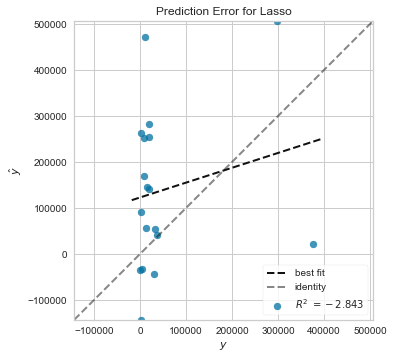

<AxesSubplot:title={'center':'Prediction Error for Lasso'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [76]:
model2 = Lasso()
visualizer = PredictionError(model2)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
visualizer.poof()

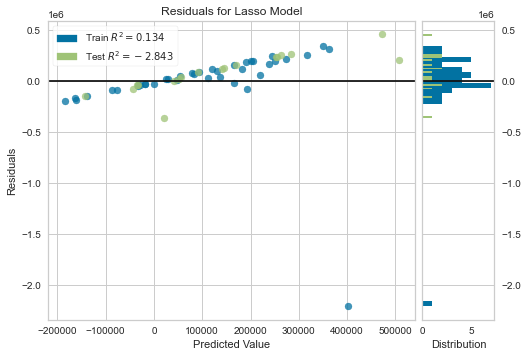

<AxesSubplot:title={'center':'Residuals for Lasso Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [77]:
model2 = Lasso()
visualizer = ResidualsPlot(model2)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
visualizer.poof()

In [ ]:
dunno = df_2014.loc[df_2014['lsoa_name'] == 'Bath and North East Somerset']
dunno['pollution']  = dictionary['Bath and North East Somerset'][0]

In [ ]:
df_2015 = avon_df.loc[avon_df['Month'] == 2015]
dunno_1 = df_2015.loc[df_2015['lsoa_name'] == 'Bath and North East Somerset']
dunno_1['pollution']  = dictionary['Bath and North East Somerset'][1]